In [64]:
# Dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime

sns.set("notebook", font_scale=1.05, rc={"figure.figsize": (10, 5)})
sns.set_style("ticks", rc={"figure.facecolor": "none", "axes.facecolor": "none"})
%config InlineBackend.figure_format = 'svg'
warnings.filterwarnings("ignore")
plt.set_loglevel("WARNING")
mpl.rcParams["lines.markersize"] = 8

# generate datetime string
now = datetime.datetime.now()
now_str = now.strftime("%m_%d_%H_%M")

In [101]:
WINDOW_SIZE = 120


df = pd.read_csv("/home/emerge/daphne/gpudrive/examples/benchmarks/dataframes/finetuning/goal_wallclock.csv")
df2 = pd.read_csv("/home/emerge/daphne/gpudrive/examples/benchmarks/dataframes/finetuning/offroad_wallclock.csv")
df3 = pd.read_csv("/home/emerge/daphne/gpudrive/examples/benchmarks/dataframes/finetuning/collision_wallclock.csv")

In [35]:
wallclock_time = df['performance/uptime'].rolling(window=WINDOW_SIZE).mean().dropna().values[:X_LIMIT]
perc_goal_achieved = df['finetune - metrics/perc_goal_achieved'].rolling(window=WINDOW_SIZE).mean().dropna().values[:X_LIMIT] *100

perc_offroad = df2['finetune - metrics/perc_off_road'].rolling(window=WINDOW_SIZE).mean().dropna().values[:X_LIMIT] *100
perc_collided = df3['finetune - metrics/perc_veh_collisions'].rolling(window=WINDOW_SIZE).mean().dropna().values[:X_LIMIT] * 100


wallclock_time = wallclock_time / 60

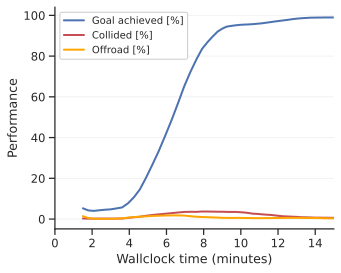

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.plot(wallclock_time, perc_goal_achieved, label="Goal achieved [%]", linewidth=2)
ax.plot(wallclock_time, perc_collided, label="Collided [%]", color='r', linewidth=2)
ax.plot(wallclock_time, perc_offroad, label="Offroad [%]", color='orange', linewidth=2)
ax.grid(axis='y', linestyle='-', color='lightgrey', alpha=0.3)
ax.set_xlabel("Wallclock time (minutes)")
ax.set_ylabel("Performance")
ax.set_xlim([0, 15])
ax.legend(loc="upper left", fontsize=10, facecolor="white", framealpha=1)
sns.despine()

plt.savefig(f'finetuning_backwards_driving.pdf', bbox_inches='tight', format='pdf')

### Log 

In [115]:
df_ga_wallclock = pd.read_csv("/home/emerge/daphne/gpudrive/examples/benchmarks/dataframes/finetuning/reward.csv")
df_rew_step = pd.read_csv("/home/emerge/daphne/gpudrive/examples/benchmarks/dataframes/finetuning/goal_achieved.csv")
df_offroad = pd.read_csv("/home/emerge/daphne/gpudrive/examples/benchmarks/dataframes/finetuning/offroad.csv")
df_collided = pd.read_csv("/home/emerge/daphne/gpudrive/examples/benchmarks/dataframes/finetuning/collided.csv")

wallclock_time = df_ga_wallclock['performance/uptime'].rolling(window=WINDOW_SIZE).mean().dropna().values / 60 / 60
global_step = df_rew_step['global_step'].rolling(window=WINDOW_SIZE).mean().dropna().values

reward_over_time = df_rew_step['PPO__R_10000__01_23_21_02_58_770 - metrics/mean_episode_reward_per_agent'].rolling(window=WINDOW_SIZE).mean().dropna().values
goal_achieved = df_ga_wallclock['PPO__R_10000__01_23_21_02_58_770 - metrics/perc_goal_achieved'].rolling(window=WINDOW_SIZE).mean().dropna().values * 100
offroad = df_offroad['PPO__R_10000__01_23_21_02_58_770 - metrics/perc_off_road'].rolling(window=WINDOW_SIZE).mean().dropna().values * 100
collided = df_collided['PPO__R_10000__01_23_21_02_58_770 - metrics/perc_veh_collisions'].rolling(window=WINDOW_SIZE).mean().dropna().values * 100

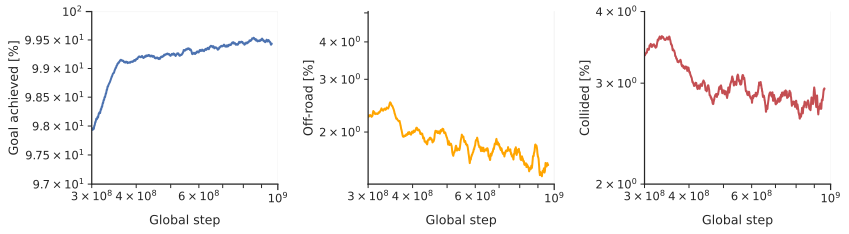

In [153]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3.5))
axs[0].plot(global_step, goal_achieved, color='b', linewidth=2)
axs[0].grid(True, color='lightgrey', alpha=0.3)
axs[0].set_xlabel("Global step", labelpad=10)
axs[0].set_ylabel("Goal achieved [%]")
axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[0].set_xlim([3e8, 1e9])
axs[0].set_ylim([97, 100])
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))

axs[1].plot(global_step, offroad, color='orange', linewidth=2)
axs[1].grid(True, color='lightgrey', alpha=0.3)
axs[1].set_xlabel("Global step", labelpad=10)
axs[1].set_ylabel("Off-road [%]")
axs[1].set_yscale('log')
axs[1].set_xscale('log')
axs[1].set_xlim([3e8, 1e9])


axs[2].plot(global_step, collided, color='r', linewidth=2)
axs[2].grid(True, color='lightgrey', alpha=0.3)
axs[2].set_xlabel("Global step", labelpad=10)
axs[2].set_ylabel("Collided [%]")
axs[2].set_yscale('log')
axs[2].set_xscale('log')
axs[2].set_xlim([3e8, 1e9])
axs[2].set_ylim([2, 4])

sns.despine()
plt.tight_layout()
plt.savefig(f'loglog_train_performance.pdf', bbox_inches='tight', format='pdf')